# All Sky Plot

Plot the position of objects on the Sky in an Aitoff projection

/Users/italo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


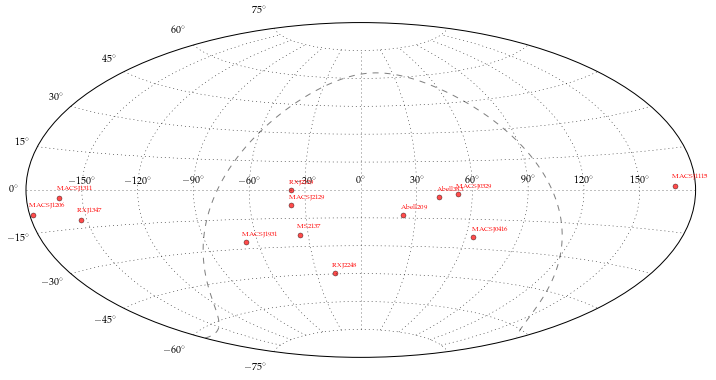

In [1]:
"""
Script to plot the distribution of objects on the sky using an Aitoff projection
"""

from __future__ import division
import argparse
import numpy as np
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

def AddLabels(rr, dd, names):
    # Annotate object names
    for i, txt in enumerate(names):
        ax.annotate(txt, (rr[i]-0.02,dd[i]+0.05), color='r', fontsize=7)

# Set up fonts 
# for Helvetica and other sans-serif fonts use:
# For example:
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Palatino'], 'size': 10})
rc('text', usetex=True)

# Read the coordinates from a file with IDs, RA, and DEC:
inp_table = 'CLASH-VLT_sample.txt'

# Read TABLE
table = ascii.read(inp_table)
ra = table["RA"]
dec = table["DEC"]
ids = table["ID"]
coord = SkyCoord(ra, dec, unit=(u.hour,u.deg), frame='icrs')
ra_rad = coord.ra.wrap_at(180 * u.deg).radian
dec_rad = coord.dec.radian

# Plot the Galactic plane
l = np.arange(360) ; b = np.zeros(360)
c = SkyCoord(l=l, b=b, unit=(u.deg,u.deg), frame="galactic")
gpra_rad = c.icrs.ra.wrap_at(180 * u.deg).radian
gpdec_rad = c.icrs.dec.radian

# Set the plot size in inches (width, height) & resolution(DPI)
fig = plt.figure(figsize=(12,6), dpi=100)
ax = fig.add_subplot(111, projection='aitoff')

# PLOT THE OBJECT DISTRIBUTION IN EQUATORIAL COORDINATES
ax.plot(ra_rad, dec_rad, 'o', color='r', markersize=5, alpha=0.7)
# Plot the Galactic plane
# Filter out the lowest points to avoid edge-to-edge line 
for i, j in enumerate(gpdec_rad):
    if j == min(gpdec_rad):
        gpmin = i
# Cut out a slice of +-6
tl = gpmin - 6; th = len(gpdec_rad) - gpmin + 6
ax.plot(gpra_rad[tl:], gpdec_rad[tl:], '--', color='grey')
ax.plot(gpra_rad[:-th], gpdec_rad[:-th], '--', color='grey')
AddLabels(ra_rad, dec_rad, ids)

# plot grid
plt.grid(True)

# Show the plot in GUI
plt.show()